<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting Started</a></span><ul class="toc-item"><li><span><a href="#References-" data-toc-modified-id="References--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>References <a id="References"></a></a></span></li></ul></li><li><span><a href="#Extended-Kalman-Filter" data-toc-modified-id="Extended-Kalman-Filter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extended Kalman Filter</a></span><ul class="toc-item"><li><span><a href="#EKF-Theory" data-toc-modified-id="EKF-Theory-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EKF Theory</a></span><ul class="toc-item"><li><span><a href="#State-variables" data-toc-modified-id="State-variables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>State variables</a></span></li><li><span><a href="#System-model-(Prediction-step)" data-toc-modified-id="System-model-(Prediction-step)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>System model (Prediction step)</a></span><ul class="toc-item"><li><span><a href="#System-model-linearization" data-toc-modified-id="System-model-linearization-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>System model linearization</a></span></li><li><span><a href="#System-model-noise" data-toc-modified-id="System-model-noise-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>System model noise</a></span></li></ul></li><li><span><a href="#Measurement-model-(Update-step)" data-toc-modified-id="Measurement-model-(Update-step)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Measurement model (Update step)</a></span><ul class="toc-item"><li><span><a href="#Measurement-model-linearization" data-toc-modified-id="Measurement-model-linearization-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Measurement model linearization</a></span></li><li><span><a href="#Measurement-model-noise" data-toc-modified-id="Measurement-model-noise-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>Measurement model noise</a></span></li></ul></li><li><span><a href="#Process-flow" data-toc-modified-id="Process-flow-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Process flow</a></span><ul class="toc-item"><li><span><a href="#PREDICTION" data-toc-modified-id="PREDICTION-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>PREDICTION</a></span></li><li><span><a href="#CORRECTION-(Update)" data-toc-modified-id="CORRECTION-(Update)-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>CORRECTION (Update)</a></span></li></ul></li></ul></li><li><span><a href="#EKF-Implementation" data-toc-modified-id="EKF-Implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>EKF Implementation</a></span><ul class="toc-item"><li><span><a href="#EXAMPLE-1" data-toc-modified-id="EXAMPLE-1-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>EXAMPLE 1</a></span><ul class="toc-item"><li><span><a href="#PLOT-example1-with-choosen-simulated-parameters" data-toc-modified-id="PLOT-example1-with-choosen-simulated-parameters-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>PLOT example1 with choosen simulated parameters</a></span></li></ul></li></ul></li></ul></li></ul></div>

<div class="alert alert-block alert-info">
<b>Tip:</b> This notebook uses nbextension TOC, enable it installing pip install jupyter-contrib-nbextensions.</div>

# Getting Started

This Notebook contains a brief theory and practical Python tests with the Extended Kalman Filter algorithm.

>**Author:** Iñaki Lorente

## References <a id='References'></a>

1. Introduction to Autonomous Mobile Robots by Roland Siegwart, Illah Reza Nourbakhs and Davide Scaramuzza, MIT Press.
2. Probabilistic Robotics by Sebastian Thrun, Wolfram Burgard and Dieter Fox, MIT Press.http://www.probabilistic-robotics.org/
3. Atsushi Sakai project. PythonRobotics, https://atsushisakai.github.io/PythonRobotics/
4. Paul Balzer Kalman documentation, https://github.com/balzer82/Kalman 
5. Kalman and Bayesian Filters in Python. Roger R Labbe Jr. https://drive.google.com/file/d/0By_SW19c1BfhSVFzNHc0SjduNzg/view

# Extended Kalman Filter

## EKF Theory

This is just an introduction of the EKF basics. All info can be studied in more detail using the references.

### State variables

Depending on the robot characteristics define the **State vector** with the correct number of states. This example shows only 3 states.
In this simple case we maintain the position x, y and orientation $\theta$ of the robot:
    
$$x = \begin{bmatrix} x \\ y \\ \theta \end{bmatrix}$$
    

The control input $u$ is the velocity $v$ and steering angle $\alpha$

$$u = \begin{bmatrix} v \\ \alpha \end{bmatrix}$$

Where:

   - $x$ and $y$ : 2D coordenates
   - $u$ : Input ($u = [v, \alpha]$, where $v$ is the velocity and $\alpha$ the angle)
   - $\theta$ : Orientation

### System model (Prediction step)

Using the EKF the system model is a nonlinear motion model plus noise.

$$x_t = g(x_{t-1}, u_t) + \epsilon_t$$

Where:

   - $g$ : Non-linear function over the state vector at time $t$. Can be used to compute the predicted state from the previous estimate
   - $u_t$ : Input ($u_t = [v, \alpha]$, where $v$ is the velocity and $w$ the gyro)
   - $x_{t-1}$ : Previous state
   - $\epsilon_t$ : Process noise at time $t$ 


Let $x_{t-1} = (x,y,\theta)^T$ be the initial pose of the robot, and suppose we keep the velocity constant at $(v, \alpha)^T$ for some time $\Delta_t$. 

The center of the circle is then:

$$x_c = x - \frac{v}{\alpha}sin(\theta)$$

$$y_c = y + \frac{v}{\alpha}cos(\theta)$$


After $\Delta_t$ time of motion, our ideal robot will be at $x_t = (x', y', \theta')^T$ with:



$\begin{bmatrix}x'\\y'\\\theta' \end{bmatrix} = \begin{bmatrix} x_c + \frac{v}{\alpha}sin(\theta + \alpha \Delta_t)\\y_c - \frac{v}{\alpha}cos(\theta + \alpha \Delta_t)\\\theta + \alpha \Delta_t\end{bmatrix} = \begin{bmatrix}x\\y\\\theta \end{bmatrix} + 
\begin{bmatrix} -\frac{v}{\alpha}sin(\theta) + \frac{v}{\alpha}sin(\theta + \alpha \Delta_t)\\\frac{v}{\alpha}cos(\theta) - \frac{v}{\alpha}cos(\theta + \alpha \Delta_t)\\ \alpha \Delta_t\end{bmatrix}$



>To compute the kinematics with non-constant velocities, it is therefore common practice to use small values for $\Delta_t$, and to approximate
the actual velocity by a constant within each time interval.


#### System model linearization

>$g$ cannot be applied to the covariance directly. A matrix of partial derivates (The Jacobian matrix) is computed.


At each time step, the Jacobian is evaluated with current predicted states. **This process linearizes the non-linear function $g$ around the current estimate**. 
    

From the Robot motion formulation exposed before, we can get the **motion model**:

$$x_t = \begin{bmatrix}x\\y\\\theta \end{bmatrix} + 
\begin{bmatrix} -\frac{v}{\alpha}sin(\theta) + \frac{v}{\alpha}sin(\theta + \alpha\Delta_t)\\\frac{v}{\alpha}cos(\theta) - \frac{v}{\alpha}cos(\theta + \alpha\Delta_t)\\ \alpha\Delta_t\end{bmatrix}$$
  

Its Jacobian is:

$G_t = \begin{bmatrix} 1 & 0 & -\frac{v_t}{\alpha_t}cos(\theta) + \frac{v_t}{\alpha_t}cos(\theta + \alpha_t\Delta_t)\\0 & 1 & -\frac{v_t}{\alpha_t}sin(\theta) + \frac{v_t}{\alpha_t}sin(\theta + \alpha \Delta_t)\\ 0 & 0 & 1\end{bmatrix}$

#### System model noise

We command a specific velocity and steering angle (using $u$), but we need to convert that into errors in $x, y, \theta$. It vary depending on velocity, so it will need to be recomputed for every prediction.

$$M_t = \begin{bmatrix}
        \alpha_1 v²_t + \alpha_2 \alpha²_t & 0 \\
        0 & \alpha_3 v²_t + \alpha_4 \alpha²_t
        \end{bmatrix}$$
        
The transformation from control space to state space is performed by another linear approximation. The Jacobian needed for this approximation, denoted $V_t$ is the derivate of the motion function $g$ with respect to the motion parameters, evaluated at $u_t$ and $u_{t-1}$

$$V_t = \frac{\partial g(u_t, u_{t-1})}{\partial u_t} = \begin{bmatrix} 
\frac{\partial x'}{\partial v_t} & \frac{\partial x'}{\partial \alpha_t} \\
\frac{\partial y'}{\partial v_t} & \frac{\partial y'}{\partial \alpha_t} \\
\frac{\partial \theta'}{\partial v_t} & \frac{\partial \theta'}{\partial \alpha_t} \\
\end{bmatrix} =
\begin{bmatrix} 
\frac{-sin \theta + sin(\theta + \alpha_t \Delta_t)}{\alpha_t} & 
\frac{v_t(sin \theta - sin(\theta + \alpha_t \Delta_t))}{\alpha²_t} + 
\frac{v_t(cos(\theta + \alpha_t \Delta_t)\Delta_t}{\alpha_t} \\
\frac{cos \theta - cos(\theta + \alpha_t \Delta_t)}{\alpha_t} &
-\frac{v_t(cos \theta - cos(\theta + \alpha_t \Delta_t))}{\alpha²_t} + 
\frac{v_t(sin(\theta + \alpha_t \Delta_t)\Delta_t}{\alpha_t} \\
0 & \Delta_t
\end{bmatrix} 
$$

The multiplication $V_t M_t V_t^T$ then provides an approximate mapping between the motion noise in control space to the motion noise in state space.

$$R_t = V_t M_t V_t^T$$

Using $R_t$ and $G_t$ we can get the error covariance ahead:

$$P_{t+1} = G_t P_{t-1} G_t^T + R_t$$

We have finished then the Prediction step.
For a real problem you have to carefully model your system with differential equations and then determine the most appropriate way to solve that system. The correct approach depends on the accuracy you require, how nonlinear the equations are, your processor budget, and numerical stability concerns.

### Measurement model (Update step)
    
The robot's sensor provides a noisy bearing and range measurement to multiple known locations in the landscape. The measurement model must convert the state $[xyθ]^T$ into a range and bearing to the landmark. If $p$ is the position of a landmark, the range $r$ is

$$r = \sqrt{(p_x - x)^2+(p_y - y)^2}$$


The sensor provides bering relative to the orientation of the robot:

$$\phi = arctan(\frac{p_y - y}{px - x}) - \theta$$
    
$$z_t = \begin{bmatrix} x \\ y \\ \theta \end{bmatrix}$$

$$z_t = h(x_t) + \delta_t = 
\begin{bmatrix}
\sqrt{(p_x - x)^2+(p_y - y)^2} \\
arctan(\frac{p_y - y}{px - x}) - \theta
\end{bmatrix} + \delta_t
$$


Where:

   - $h$ : Non-linear function over the state vector at time $t$. Can be used to compute the predicted mesurement from the predicted state
   - $\delta_t$ : Observation noise at time $t$ 
   - $p$ : Position of a landmark
   - $r$ : range mesurement
   - $\phi$ : Bearing or heading direction
   

#### Measurement model linearization    

Same way we did at State model part with function $g$, here we need to linearize the nonlineal function $h$
  
$$H_t = \frac{\partial h(\hat{x},p)}{\partial x_t} =
\begin{bmatrix} 
\frac{-p_x + x}{\sqrt{(p_x - x)^2+(p_y - y)^2}} &
\frac{-p_y + y}{\sqrt{(p_x - x)^2+(p_y - y)^2}} & 0 \\
\frac{-p_y + y}{\sqrt{(p_x - x)^2+(p_y - y)^2}} &
-\frac{p_x + x}{\sqrt{(p_x - x)^2+(p_y - y)^2}} & -1
\end{bmatrix}$$

#### Measurement model noise

Additional mesurement noise from the previous measurement state:

$$Q_t = \begin{bmatrix} 
\sigma_x^2 & 0 & 0 \\
 0 & \sigma_y^2 & 0 \\
 0 & 0 & \sigma_\phi^2
\end{bmatrix}$$



###  Process flow

#### PREDICTION

Project the state vector ahead : 

$$x_{t+1} = g(x_t, u)$$

Project the error covariance ahead: 

$$P_{t+1} = G_t P_{t-1} G_t^T + R_t$$


#### CORRECTION (Update)

Compute the Kalman Gain : 

$$K_t = P_t H_t^T (H_t P_t H_t^T + Q_t)^-1$$

Update the estimate via mesurement : 

$$x_t = x_t + K_t (z_t - h(x_t))$$ 


Update the error covariance : 

$$P_t = (1-K_t H_t) P_t$$


Where:

- $K_t$ : Kalman Gain
- $P_t$ : Covariance matrix of the state at time t
- $Q_t$ : Covariance matrix of measurement noise at time t
- $R_t$ : Covariance matrix of system noise at time t
- $G_t$ : Jacobian of system function at time t
- $H_t$ : Jacobian of measurement function at time
    

    
    

## EKF Implementation

In [55]:
import math
import cmath
import numpy as np
import sympy


class EKF():
    
    def __init__(self, dt, wheelbase):
        
        # Dimensions
        dim_x = 3
        dim_z = 2
        
        #######################
        # 0. INIT
        #######################
        self.dt = dt
        self.wheelbase = wheelbase
        
        self.x = np.zeros((dim_x,1))        # True trajectory state
        self.P = np.eye(dim_x)              # uncertainty covariance
        self.G = np.eye(dim_x)              # state transition matrix
        self.R = np.eye(dim_z)              # state uncertainty
        self.Q = np.eye(dim_x)              # process uncertainty
        
        self.K = np.zeros(self.x.shape)     # kalman gain
        self.S = np.zeros((dim_z, dim_z))   # system uncertainty
        self.y = np.zeros((dim_z, 1))       # residual
        self.I = np.eye(dim_x)              # identity matrix
        
        self.x_est = self.x                 # Estimated trajectory state
        
        ##################################
        # 1. FORUMLAS: Get sympy symbols
        ##################################
        x, y, theta, v, a, w, t, lx, ly = sympy.symbols('x, y, theta, v, a, w, t, lx, ly')

        # Get wheel information
        dist = v*t # distance
        beta = (dist/w)*sympy.tan(a) # (distance/wheelbase) * steering angle
        r  = w/sympy.tan(a) # radius

        ###################
        # 1.1 System model
        ###################

        # state = [x,y,theta] (pos_x, pos_y, yaw_rate)
        self.state_formula = sympy.Matrix([x,y,theta])

        # motion = [v,a] (velocity, steering angle)
        self.motion_formula = sympy.Matrix([v,a])

        # g = Non-linear function over the state vector at time t (predicted state)
        self.g_formula = sympy.Matrix([[x-beta*sympy.sin(theta)+r*sympy.sin(theta + beta)],
                          [y+r*sympy.cos(theta)-r*sympy.cos(theta + beta)],
                          [theta+beta]
                         ])

        # Jacobian of g evaluated using state
        self.G_formula = self.g_formula.jacobian(self.state_formula)

        # Jacobian of g evaluated using motion
        self.V_formula = self.g_formula.jacobian(self.motion_formula)
        
        ########################
        # 1.2 Measurement model
        ########################

        # It depends on the measurement sensor used
        # this case sensor provides noise bearing and range
        # based on landmarks

        # range
        r = sympy.sqrt((lx-x)**2 + (ly-y)**2)
        # bearing
        b = sympy.atan((ly-y)/(lx-x))

        # h = Non-linear function over the state vector at time t (predicted mesurement)
        self.h_landmark_formula = sympy.Matrix([[r],
                                                [b-theta]
                                               ])
        
        self.h_odom_formula = sympy.Matrix([[x],
                                            [y],
                                            [theta]
                                           ])

        # Jacobian of h evaluated using state
        self.H_landmark_formula = self.h_landmark_formula.jacobian(self.state_formula)
        
        self.H_odom_formula = self.h_odom_formula.jacobian(self.state_formula)

        ##################################
        # 2. Save values in a dictionary
        ##################################
        self.ekf_dict = {x: 0, y: 0, theta:0,
                         v:0, a:0, 
                         t:dt, w:wheelbase}
        
        # This just creates a link to the dictionay keys
        # the value of the following variables are just
        # names (dictionary key names)
        self.x_x, self.x_y, self.theta = x, y, theta 
        self.v, self.a = v, a
        
    def __repr__(self):
        return '\n'.join([
            'Extended Kalman Filter object',
            '------------------------------',
            'x: ', str(self.x),
            'P: ', str(self.P),
            'x_est: ', str(self.x_est),
            'G: ', str(self.G),
            'Q: ', str(self.Q),
            'R: ', str(self.R),
            'K: ', str(self.K),
            'y: ', str(self.y),
            'S: ', str(self.S)
            ])
        
    def predict(self, x, u):
        '''EKF Prediction step
                input  -> u = motion control [v,a] 
                call   -> move function
                action -> get P based on new values
        '''      
        
        self.x = x

        # Write values on EKF dictionary
        self.ekf_dict[self.x_x] = self.x[0,0]
        self.ekf_dict[self.x_y] = self.x[1,0]
        self.ekf_dict[self.theta] = self.x[2,0]
        self.ekf_dict[self.v] = u[0]
        self.ekf_dict[self.a] = u[1]
        
        # Get G,V values applying dicctionary values to formulas
        self.G = np.array(self.G_formula.evalf(subs=self.ekf_dict)).astype(float)
        self.V = np.array(self.V_formula.evalf(subs=self.ekf_dict)).astype(float)

        # M = Covariance of motion noise
        self.M = np.array([[u[0]**2, 0], 
                           [0, u[1]**2]
                          ])

        self.Q = np.dot(self.V, self.M).dot(self.V.T)
        
        # P = Error covariance
        self.P = np.dot(self.G, self.P).dot(self.G.T) + self.Q
        

    def update_landmark_method(self, landmark, std_range, std_bearing):
        '''EKF Update step based on landmarks
                input  -> landmarks, sensor range and bearing          
                action -> update P and state (x) based on measurements
        '''
        for lmark in landmark:
            hyp = (lmark[0] - self.x[0, 0])**2 + (lmark[1] - self.x[1, 0])**2
            dist = math.sqrt(hyp)

            # Get measurement h on last current state
            # This state (x) has predictions applied
            self.h = np.array([[dist],
                               [math.atan2(lmark[1] - self.x[1, 0], lmark[0] - self.x[0, 0]) - self.x[2, 0]]
                              ])

            # Get jacobian of h on last current state
            # This state (x) has predictions applied
            self.H = np.array([[-(lmark[0] - self.x[0, 0]) / dist, -(lmark[1] - self.x[1, 0]) / dist, 0],
                               [(lmark[1] - self.x[1, 0]) / hyp,  -(lmark[0] - self.x[0, 0]) / hyp, -1]
                              ])           

            # Get measurement based on true state (x)
            # This state (x) is prior to predictions
            x, y = self.x[0, 0], self.x[1, 0]
            d = math.sqrt((lmark[0] - x)**2 + (lmark[1] - y)**2)  
            a = math.atan2(lmark[1] - y, lmark[0] - x) - self.x[2, 0]
            self.z = np.array([[d + np.random.randn()*std_range],
                               [a + np.random.randn()*std_bearing]
                              ])

            # Covariance of measurement noise
            self.R = np.diag([std_range**2, std_bearing**2])

            # K = Kalman Gain
            PHT = np.dot(self.P, self.H.T)
            self.S = np.dot(self.H,PHT) + self.R
            self.K = PHT.dot(np.linalg.inv(self.S))

            # Update the estimate via mesurement (state)
            self.y = self.residual(self.z, self.h)
            self.x_est = self.x + np.dot(self.K, self.y)

            # Update Error covariance (P)
            self.P = (self.I - np.dot(self.K,self.H)).dot(self.P)
            #I_KH = self.I - np.dot(self.K, self.H)
            #self.P = np.dot(I_KH, self.P).dot(I_KH.T) + np.dot(self.K, self.R).dot(self.K.T)
            
        return self.x_est, self.P
    
    def update_odom_method(self, odom):
        '''EKF Update step based on odometry measurement
                input  -> [x,y,theta]         
                action -> update P and state (x) based on measurements
        '''
        
        # Get h,H values applying dicctionary values to formulas
        self.h = np.array(self.h_odom_formula.evalf(subs=self.ekf_dict)).astype(float)
        self.H = np.array(self.H_odom_formula.evalf(subs=self.ekf_dict)).astype(float)        

        # Get measurement based on true state (x)
        Qsim = np.diag([0.5, 0.5, 0.5])**2
        Rsim = np.diag([1.0, 1.0, np.deg2rad(30.0)])**2
        self.z = np.array([[self.x[0, 0] + np.random.randn() * Qsim[0, 0]],
                           [self.x[1, 0] + np.random.randn() * Qsim[1, 1]],
                           [self.x[2, 0] + np.random.randn() * Qsim[2, 2]],
                          ])

        # Covariance of measurement noise
        self.R = np.diag([odom[0]**2, odom[1]**2, odom[2]**2])

        # K = Kalman Gain
        PHT = np.dot(self.P, self.H.T)
        self.S = np.dot(self.H,PHT) + self.R
        self.K = PHT.dot(np.linalg.inv(self.S))

        # Update the estimate via mesurement (state)
        self.y = self.residual(self.z, self.h)
        self.x_est = self.x + np.dot(self.K, self.y)

        # Update Error covariance (P)
        self.P = (self.I - np.dot(self.K,self.H)).dot(self.P)
        #I_KH = self.I - np.dot(self.K, self.H)
        #self.P = np.dot(I_KH, self.P).dot(I_KH.T) + np.dot(self.K, self.R).dot(self.K.T)
            
        return self.x_est, self.P

            
    def residual(self, a, b):
        """ compute residual (a-b) between measurements containing 
        [range, bearing]. Bearing is normalized to [-pi, pi)"""
        y = a - b
        y[1,0] = y[1,0] % (2 * np.pi)    # force in range [0, 2 pi)
        if y[1,0] > np.pi:               # move to [-pi, pi)
            y[1,0] -= 2 * np.pi
        return y

    def move(self, x, u, dt):
        '''SIM ROBOT MOVEMENT. To be used if we don't have odometry 
           from robot. This function is mainly used for 
           test purposes.
        '''
        theta = x[2, 0] # x = [x, y, theta] where 'theta' is the steer angle
        vel = u[0]      # u = [v, a] -> get velocity
        steering_angle = u[1] # u = [v, a] -> get steer angle
        dist = vel * dt # distance

        if abs(steering_angle) > 0.001: # is robot turning?
            beta = (dist / self.wheelbase) * math.tan(steering_angle)
            r = self.wheelbase / math.tan(steering_angle) # radius

            dx = np.array([[-r*math.sin(theta) + r*math.sin(theta + beta)], 
                           [r*math.cos(theta) - r*math.cos(theta + beta)], 
                           [beta]])
        else: # moving in straight line
            dx = np.array([[dist*cos(theta)], 
                           [dist*sin(theta)], 
                           [theta]])
            
        # Update current state
        self.x = x + dx
        
        return self.x
    
    def plot_covariance_ellipse(self, xEst, PEst):
        ''' Just a way to plot P covariance
        based on https://github.com/AtsushiSakai/PythonRobotics
        '''
        Pxy = PEst[0:2, 0:2]
        eigval, eigvec = np.linalg.eig(Pxy)

        if eigval[0] >= eigval[1]:
            bigind = 0
            smallind = 1
        else:
            bigind = 1
            smallind = 0

        t = np.arange(0, 2 * math.pi + 0.1, 0.1)
        a = cmath.sqrt(eigval[bigind])
        b = cmath.sqrt(eigval[smallind])
        x = [a * math.cos(it) for it in t]
        y = [b * math.sin(it) for it in t]
        angle = math.atan2(eigvec[bigind, 1], eigvec[bigind, 0])
        R = np.array([[math.cos(angle), math.sin(angle)],
                      [-math.sin(angle), math.cos(angle)]])
        fx = R.dot(np.array([[x, y]]))
        px = np.array(fx[0, :] + xEst[0, 0]).flatten()
        py = np.array(fx[1, :] + xEst[1, 0]).flatten()

        #plt.plot(px, py, "--g")

        return px, py

### EXAMPLE 1

In [56]:
###############################################################
# Instantiate EKF with 
#    - initial state x -> [x,y,theta] 
#    - sample rate -> dt  (hz, i.e -> 1.0/50.0 = 50 Hz)
#    - wheelbase
#    - velocity
#    - steer_angle
###############################################################

def example1():
    #############
    # INIT
    #############
    ekf = EKF(dt=1.0, 
              wheelbase=0.5)
    
    return ekf

#### PLOT example1 with choosen simulated parameters

In [78]:
import matplotlib.pyplot as plt


def run_simulation(start_pos, u, std_range=0.3, std_bearing=0.1, landmark=True, landmarks=0):

    ekf = example1()   #USE EXAMPLE1

    ################
    # Plot Variables
    ################
    prediction_step=10
    sim_pos = start_pos.copy()    
    track = []
    estimated = []
    covariance = []

    ################
    # Start example
    ################ 
    for i in range(200):
        sim_pos = ekf.move(sim_pos, u, 1.0/10.) # start simulation, move robot
        track.append(sim_pos)

        # Apply EKF every 'prediction_step' times
        if i % prediction_step == 0:
            ekf.predict(sim_pos, u)
            if landmark:
                estimated_ = ekf.update_landmark_method(landmarks, std_range, std_bearing)
            else:
                estimated_ = ekf.update_odom_method(sim_pos)
                
            estimated.append(estimated_[0])
            covariance.append([estimated_[0], estimated_[1]])
            

    ################
    # PLOT EXAMPLE
    ################

    if landmark: 
        # Plot landmarks        
        plt.figure()
        plt.scatter(landmarks[:, 0], landmarks[:, 1], marker='s', s=60, label='Landmarks')

    # Plot track (True trajectory)
    track = np.array(track)
    plt.plot(track[:, 0], track[:,1], color='k', linewidth =2, label='True trajectory')

    # Plot estimated (Estimated trajectory)
    estimated = np.array(estimated)
    plt.plot(estimated[:, 0], estimated[:, 1], color='r', linewidth =2, label='Estimated trajectory')

    # Plot covariance matrix estimation
    label_added =False
    for element in covariance:
        c = ekf.plot_covariance_ellipse(element[0], element[1])
        if not label_added:
            plt.plot(c[0], c[1], '--g', label='Covariance matrix')
            label_added = True
        else:
            plt.plot(c[0], c[1], '--g')

    # Plot general options

    plt.legend()
    plt.axis('equal')
    plt.title("EKF Robot localization")
    plt.show()

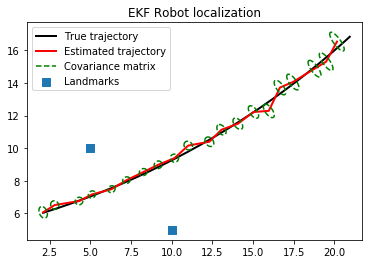

In [79]:
#########################################
# USING LANDMARKS: SIMULATION PARAMETERS
#########################################
start_pos = np.array([[2, 6, .3]]).T # First State position
u = np.array([1.1, .01])             # Constant steering command (vel, steering angle radians)

std_range = 0.3     # Measurement range
std_bearing = 0.1   # Measurement bearing
landmarks = np.array([[5, 10], [10, 5]])  # Landmarks position

run_simulation(start_pos, 
               u,
               std_range,
               std_bearing, 
               landmark = True, 
               landmarks = landmarks)

- This simulations runs a filter prediction based on 2 landmarks we can see how the last part of the filter estimation gets worst uncertinaty (covariance maxtrix of the process). This is because the distance to a landamark is getting farther.

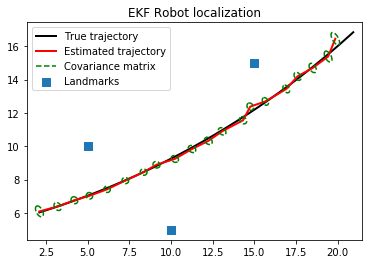

In [80]:
#########################################
# USING LANDMARKS: SIMULATION PARAMETERS
#########################################
start_pos = np.array([[2, 6, .3]]).T # First State position
u = np.array([1.1, .01])             # Constant steering command (vel, steering angle radians)

std_range = 0.3     # Measurement range
std_bearing = 0.1   # Measurement bearing
landmarks = np.array([[5, 10], [10, 5], [15, 15]])  # Landmarks position

run_simulation(start_pos, 
               u,
               std_range,
               std_bearing, 
               landmark = True, 
               landmarks = landmarks)

- This second simulation runs a filter prediction based on 3 landmarks, we can se now how the uncertainity gets better results at the end of the filter estimation. Now the filer gets a landmark position close by and the update step of the filter gets better results.

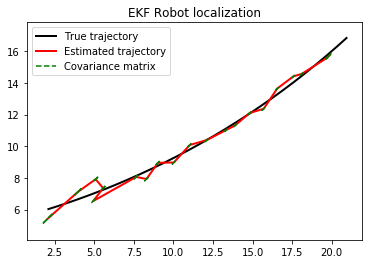

In [81]:
#########################################
# USING ODOMETRY: SIMULATION PARAMETERS
#########################################
start_pos = np.array([[2, 6, .3]]).T # First State position
u = np.array([1.1, .01])             # Constant steering command (vel, steering angle radians)

run_simulation(start_pos, 
               u,
               landmark = False)

TODO: Covariance matrix is not well represented, check ellipse plot function